## Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print(f"Training set: {len(training_set.class_names)} classes")
print(f"Training set class names: {training_set.class_names}")

Found 13018 files belonging to 7 classes.
Training set: 7 classes
Training set class names: ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=training_set.class_names,  # Use same class names as training
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print(f"Validation set: {len(validation_set.class_names)} classes")

Found 3255 files belonging to 7 classes.
Validation set: 7 classes


## Building Model

In [27]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [28]:
cnn.add(tf.keras.layers.Input(shape=(128, 128, 3)))


In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [33]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [34]:
cnn.add(tf.keras.layers.Flatten())

In [35]:
cnn.add(tf.keras.layers.Dense(units=1000, activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [37]:
cnn.add(tf.keras.layers.Dense(units=len(training_set.class_names), activation='softmax'))

### Compiling and Training Phase

In [38]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │    16,385,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         7,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,564,263 (67.00 MB)

 Trainable params: 17,564,263 (67.00 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 200s 492ms/step - accuracy: 0.9172 - loss: 0.2180 - val_accuracy: 0.9214 - val_loss: 0.2128
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 232s 570ms/step - accuracy: 0.9538 - loss: 0.1287 - val_accuracy: 0.9631 - val_loss: 0.1102
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 250s 615ms/step - accuracy: 0.9670 - loss: 0.0898 - val_accuracy: 0.9680 - val_loss: 0.0992
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 346s 850ms/step - accuracy: 0.9723 - loss: 0.0811 - val_accuracy: 0.9708 - val_loss: 0.0882
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 273s 672ms/step - accuracy: 0.9789 - loss: 0.0606 - val_accuracy: 0.9736 - val_loss: 0.0762
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 189s 465ms/step - accuracy: 0.9808 - loss: 0.0540 - val_accuracy: 0.9788 - val_loss: 0.0637
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 188s 462ms/step - accuracy: 0.9847 - loss: 0.0422 - val_accuracy: 0.9757 - val_loss: 0.0710
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 222s 546ms/step - accuracy: 0.9877 -

## Evaluating Model

In [42]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

407/407 ━━━━━━━━━━━━━━━━━━━━ 50s 122ms/step - accuracy: 0.9855 - loss: 0.0369
Training accuracy: 0.9854816198348999


In [43]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9680 - loss: 0.1211
Validation accuracy: 0.968049168586731


### Saving Model

In [44]:
cnn.save('trained_plant_disease_model.keras')

In [45]:
training_history.history #Return Dictionary of history

{'accuracy': [0.9171915650367737,
  0.9537563323974609,
  0.9670456051826477,
  0.9722691774368286,
  0.9788753986358643,
  0.9807958006858826,
  0.9847134947776794,
  0.9877093434333801,
  0.9862498044967651,
  0.9904747009277344],
 'loss': [0.21804726123809814,
  0.12868502736091614,
  0.0898425281047821,
  0.0811435803771019,
  0.06061750277876854,
  0.05400286242365837,
  0.0422394685447216,
  0.034136656671762466,
  0.03823724761605263,
  0.02803151309490204],
 'val_accuracy': [0.9213517904281616,
  0.9631336331367493,
  0.968049168586731,
  0.9708141088485718,
  0.9735791087150574,
  0.9788018465042114,
  0.9757296442985535,
  0.9775729775428772,
  0.9735791087150574,
  0.968049168586731],
 'val_loss': [0.21275006234645844,
  0.1101713478565216,
  0.09919167309999466,
  0.08815617114305496,
  0.07616318017244339,
  0.06366464495658875,
  0.07096341252326965,
  0.07504797726869583,
  0.08710784465074539,
  0.12114553898572922]}

In [46]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [47]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

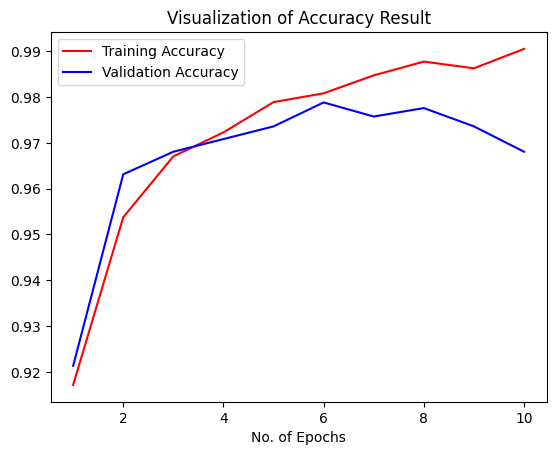

In [48]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [49]:
class_name = validation_set.class_names

In [51]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',  # <-- Use the correct path
    labels="inferred",
    label_mode="categorical",
    class_names=class_name,  # <-- Use the class names from training set
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=42,  # <-- Add a seed for reproducibility
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3255 files belonging to 7 classes.


In [52]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3255/3255 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step


In [53]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [54]:
Y_true

<tf.Tensor: shape=(3255,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6], shape=(3255,))>

In [56]:
predicted_categories

<tf.Tensor: shape=(3255,), dtype=int64, numpy=array([0, 0, 2, ..., 6, 6, 6], shape=(3255,))>

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [58]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.87      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      1.00      0.94       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465
                             Potato___Early_blight       1.00      0.93      0.97       485
                              Potato___Late_blight       0.94      0.97      0.96       485
                                  Potato___healthy       0.97      1.00      0.98       456

                                          accuracy                           0.97      3255
                                         macro avg       0.97      0.97      0.97      3255
                                      weighted avg       0.97      0.97      0

### Confusion Matrix Visualization

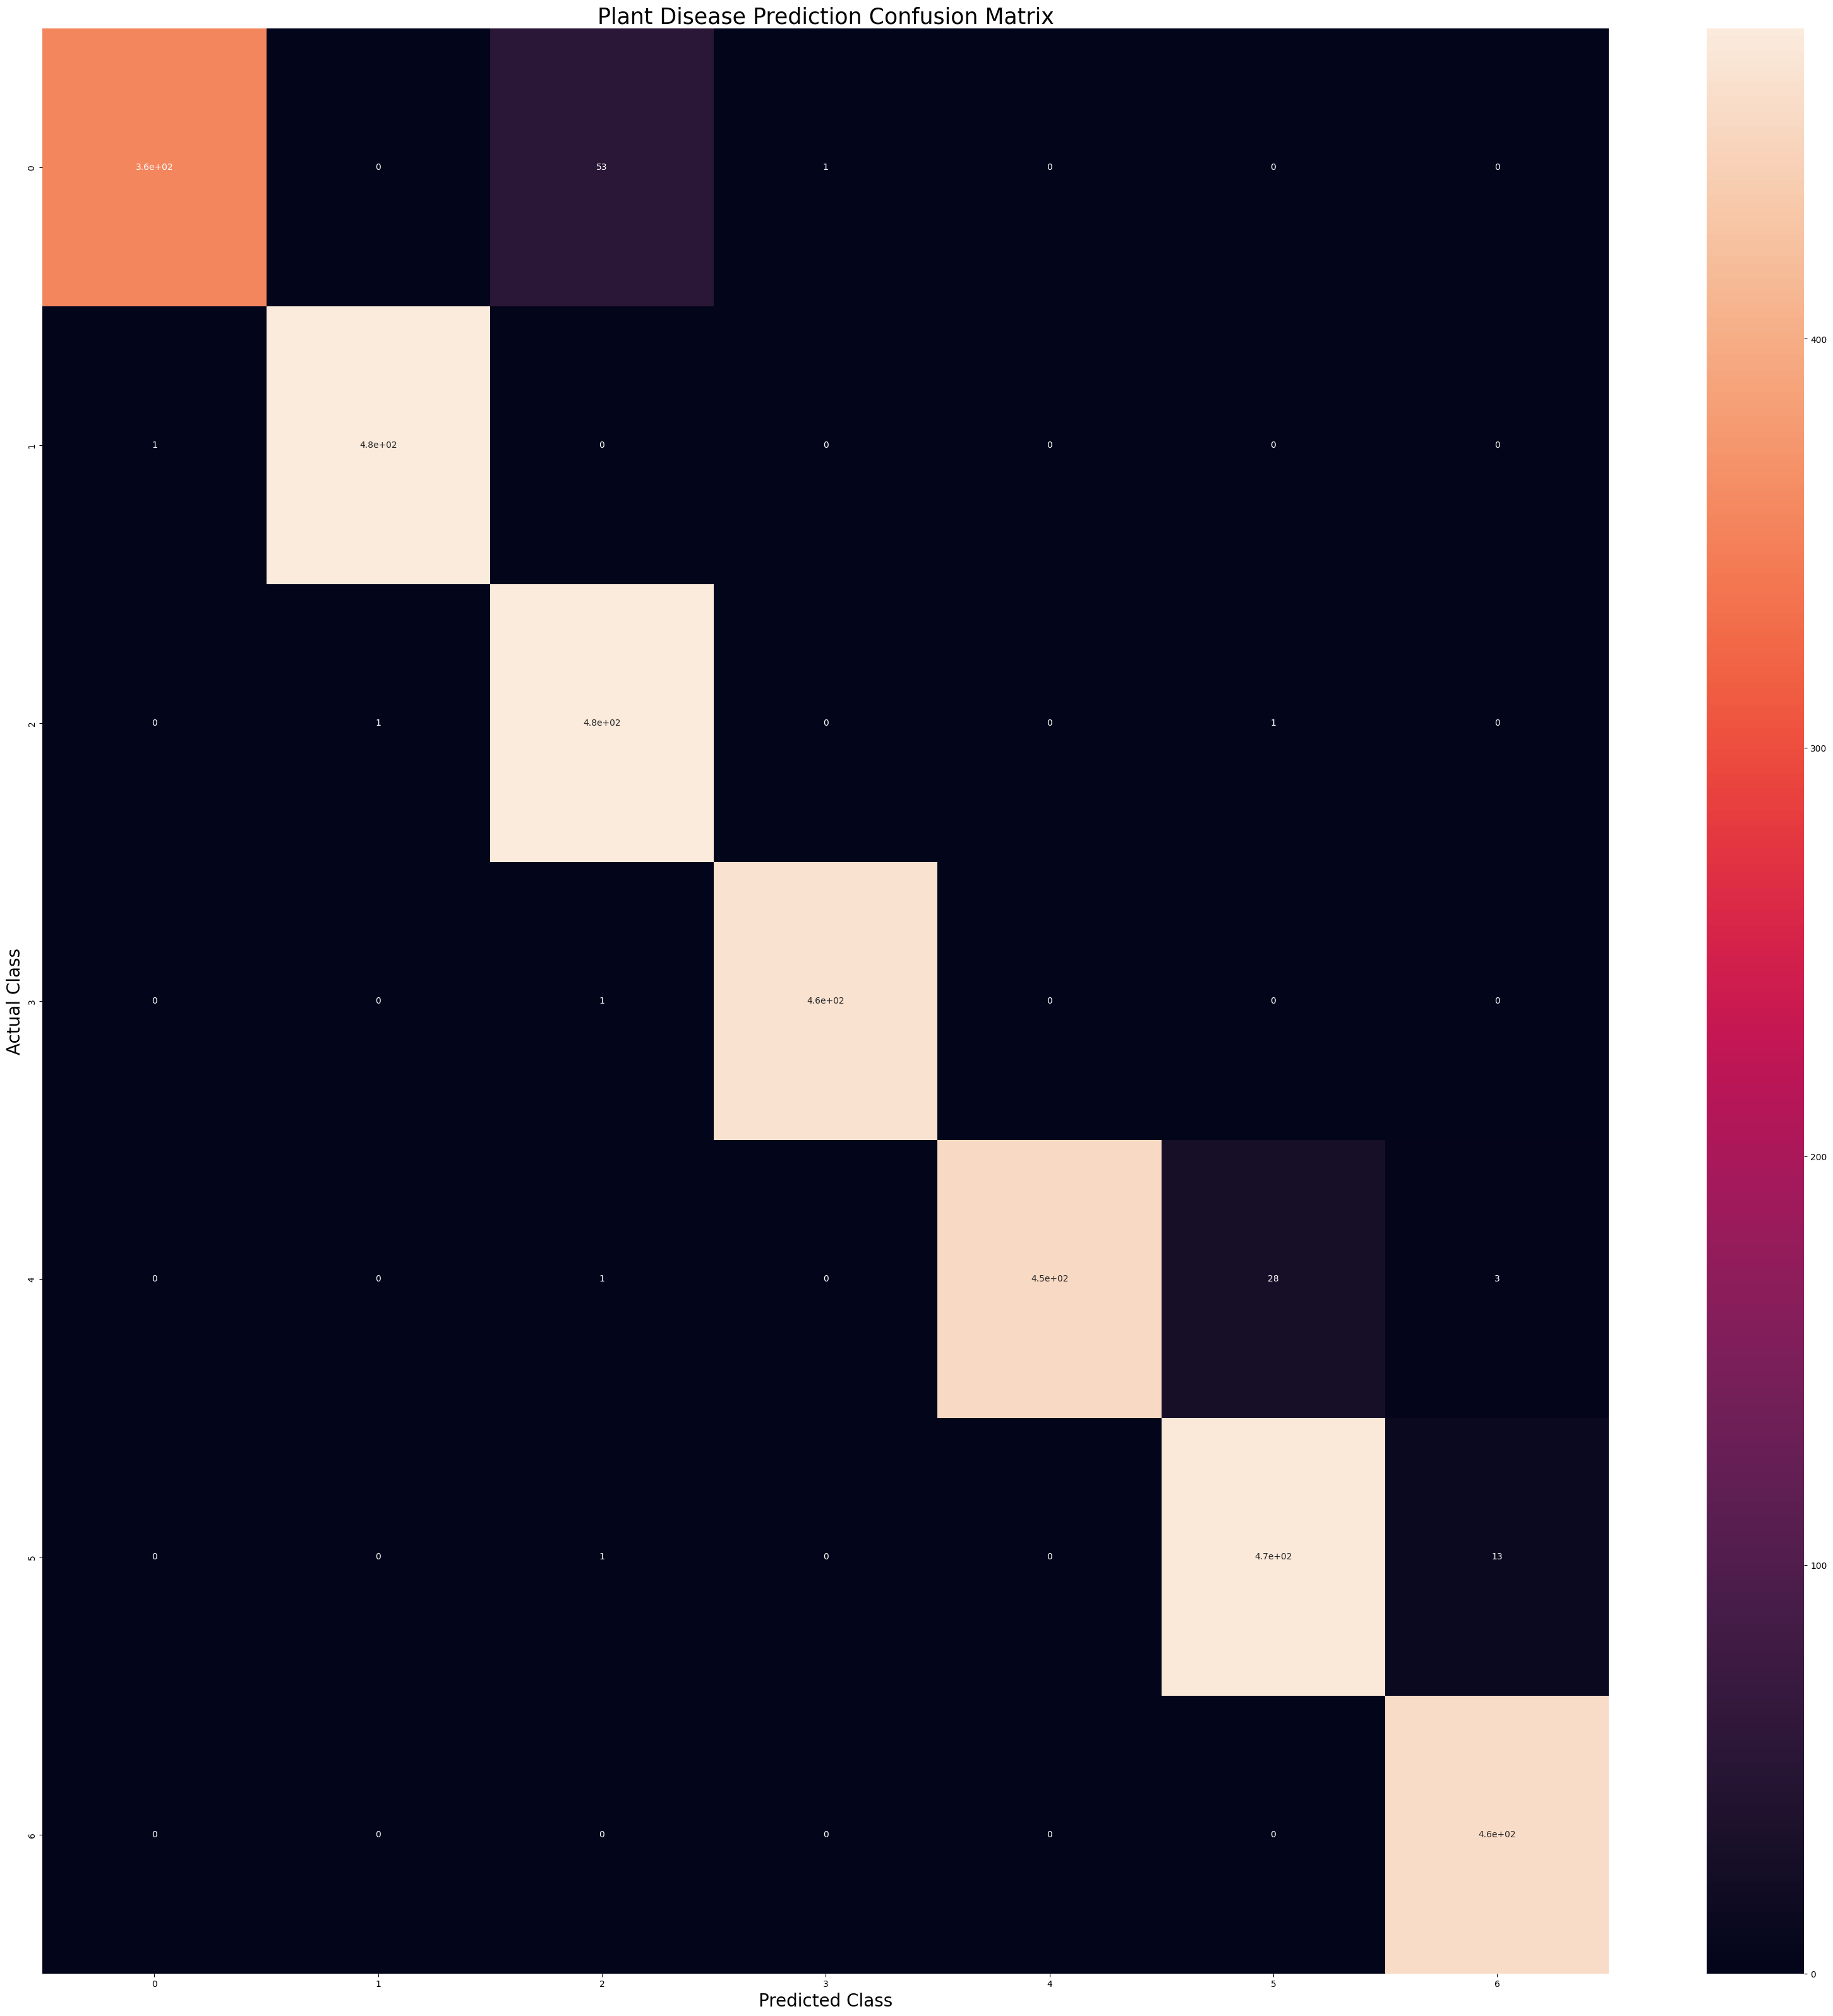

: 

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()